# Image Enhancement

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

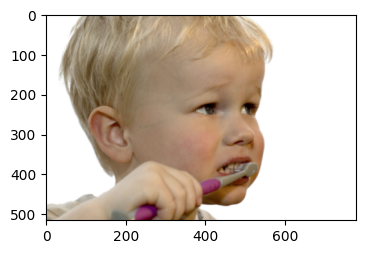

In [2]:
image = cv.imread('sample2.jpeg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(4,4))
plt.imshow(image)

In [3]:
image.shape

(516, 780, 3)

## Gambar Terdiri dari 3 Chanel

Setiap pixel pada gambar terdiri dari 3 channel, yaitu:
- Red
- Green
- Blue

Sehingga jika suatu gambar dengan resolusi 800pxx600px maka dimensi gambar dalam format array adalah [800, 600, 3]

|Baris|Kolom|Channel|
|-|-|-|
|800|600|3|

Secara default komputer akan selalu menampilkan gambar dengan format 3 channel (RGB). Untuk menampilkan gambar hanya pada salah satu channel saja dapat dilakukan dengan mengubah nilai pada channel lainnya menjadi 0.

### Seleksi Nilai Dimensi Pada Tertentu Menggunakan Numpy 

Data gambar memiliki struktur array 3 dimensi yaitu Baris, Kolom, dan Channel. Untuk mengubah nilai pada suatu channel maka perlu dilakukan seleksi nilai pada array. Pada dasarnya setiap gambar yang dimuat menggunakan OpenCV akan memiliki tipe data Numpy Array. Pada Numpy untuk seleksi nilai pada dimensi tertentu dilakukan dengan cara seperti berikut.

- [:, :, 0] untuk channel Red
- [:, :, 1] untuk channel Green
- [:, :, 2] untuk channel Blue

<sub><sup>*Karakter titik dua ( : ) memiliki arti bahwa semua nilai pada dimensi tersebut</sup></sub>

Sehingga jika suatu pixel memiliki nilai:
|R|G|B|
|-|-|-|
|100|50|30|

Setelah diubah nilainya pada channel Grenn dan Blue untuk memunculkan channel Red menjadi seperti berikut:
|R|G|B|
|-|-|-|
|100|0|0|

**Red**

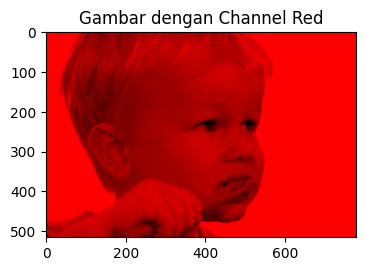

In [4]:
# duplikasi array menjadi variabel baru agar tidak mempengaruhi gambar aslinya
R = image.copy()
# Seleksi nilai pada semua baris dan kolom namun hanya pada channel yang kedua (index ke-1)
R[:,:,1] = 0
# Seleksi nilai pada semua baris dan kolom namun hanya pada channel yang kedua (index ke-2)
R[:,:,2] = 0
# Menentukan ukuran gambar dalam satuan inch
plt.figure(figsize=(4,4))
# Fungsi untuk menampilkan gambar
plt.title('Gambar dengan Channel Red')
plt.imshow(R)

**Green**

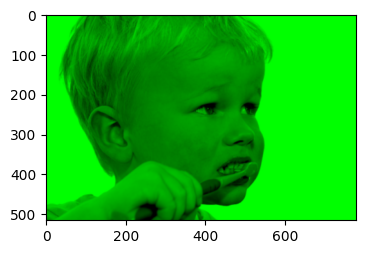

In [5]:
G = image.copy()
G[:,:,0] = 0
G[:,:,2] = 0
plt.figure(figsize=(4,4))
plt.imshow(G)

**Blue**

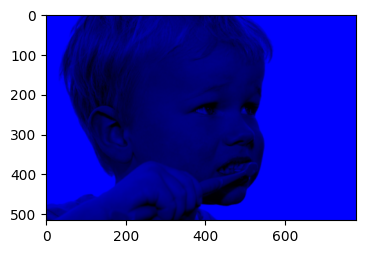

In [6]:
B = image.copy()
B[:,:,0] = 0
B[:,:,1] = 0
plt.figure(figsize=(4,4))
plt.imshow(B)

## Point Processing

Point processing merupakan proses enhancement citra yang dilakukan dengan mengubah intensitas pada masing-masing pixel. Hal ini dapat dilakukan dengan melakukan penjumlahan atau pengurangan nilai pixel pada masing-masing channel. Gambar yang dimuat menggunakan library OpenCV akan memiliki tipe data **uint8**.

In [7]:
image.dtype

dtype('uint8')

**uint8** merupakan singkatan dari Unsigned Integer. Unisgned integer merupakan tipe data bilangan bulat yang hanya menerima nilai yang positif. Jika ingin menggunakan nilai integer dengan rentang nilai positif dan negatif dapat menggunakan tipe data **int8**. Angka delapan (8) pada tipe data menunjukkan rentangan nilai yang dapat ditampung.

Tipe data bilangan dengan rentangan delapan memiliki arti bahwa nilai yang dapat ditampung $2^{8}$ yang berarti: 

$\begin{matrix*}[l]
2^{8} = 2x2x2x2x2x2x2x2 \\
2^{8} = 256
\end{matrix*}$

<sub><sup>*Jika penjumlahan dilakukan hingga mendapatkan hasil lebih dari 256 maka nilai hasil penjumlahan secara otomatis akan kembali ke 1.</sub></sup>

Sebagai contoh kita buat sebuah Numpy Array dengan nilai
> [190, 200, 210]

Jika kita tambahkan nilai 50 pada masing-masing nilai maka seharusnya hasilnya adalah
> [240, 250, 260]

Namun, dikarenakan batasan dari tipe data **uint8** adalah 256 maka pada nilai ketiga akan menjadi 4
> [240, 250, (260-256)] => [240, 250, 4]

In [8]:
a = np.array([190,200,210]).astype('uint8')
a.dtype

dtype('uint8')

In [9]:
a = a+50
print(a)

[240 250   4]


Jika hal tersebut dilakukan maka point processing yang dilakukan tidak akan memberikan hasil yang tidak sesuai

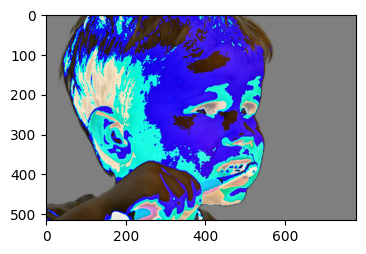

In [10]:
plt.figure(figsize=(4, 4))
tmp = image.copy()-128
plt.imshow(tmp)

Untuk mengatasi hal tersebut maka dilakukan beberapa tahapan seperti berikut:
1. Mengubah tipe data dengan rentang yang lebih tinggi untuk menghindari perubahan nilai kembali dari 1 setelah melebihi nilai 256.
2. Menambahkan intensitas pada masing-masing pixel dengan menerapkan aturan sebagai berikut:
    - Jika intensitas setelah ditambahkan lebih dari 256 atau kurang dari 0 maka nilai yang digunakan adalah batas nilainya yaitu 256 atau 0 tergantung operasi yang dilakukan penambahan atau pengurangan.
    - Jika intensitas setelah ditambahkan tidak lebih dari 256 atau kurang dari 0 maka nilai yang digunakan adalah nilai hasil penjumlahan.

Pada operasi penambahan

$ v(i,j)' = 
    \left\{
        \begin{matrix*}[l]
            256                 & , if v(i,j)+intensity>256 \\
            v(i,j)+intensity    & , otherwise 
        \end{matrix*}
    \right. 
$

Pada operasi pengurangan:

$ v(i,j)' = 
    \left\{
        \begin{matrix*}[l]
            0                 & , if v(i,j)+intensity<0 \\
            v(i,j)+intensity    & , otherwise 
        \end{matrix*}
    \right. 
$

### 1. Mengubah Tipe Data Numpy

Mengubah tipe data pada Numpy menggunakan fungsi **astype()** dengan parameter tipe data dalam bentuk string.
Mengubah tipe data dilakukan dengan menjalankan perintah berikut:

In [11]:
tmp = image.copy()
tmp.dtype

dtype('uint8')

In [12]:
tmp = tmp.astype('uint16')
tmp.dtype

dtype('uint16')

### 2. Mengubah Intensitas pada Setiap Pixel dengan Kondisi

Mengubah intensitas atau nilai pada masing-masing pixel dengan kondisi tertentu dapat dilakukan dengan menggunakan fungsi dari Numpy. Fungsi yang digunakan adalah **where**. Fungsi where menerima tiga (3) parameter yaitu kondisi, nilai jika kondisi terpenuhi, dan nilai jika kondisi tidak terpenuhi.

Text(0.5, 0.25, 'a.Intensitas Langsung Dikurangi b. Perubahan Tipe Data dan Penerapan Kondisi')

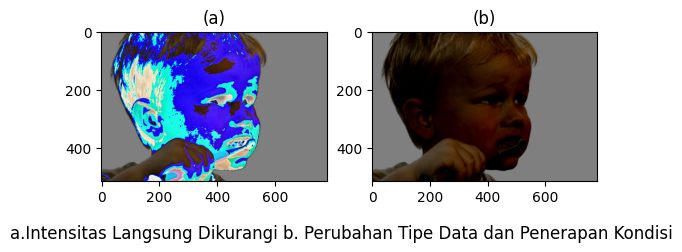

In [13]:
import matplotlib.pyplot as plt
import numpy as np

## Percobaan 1
# Point processing dengan cara langsung mengurangi nilai
tmp=image.copy()-128

# Menampilkan percobaan 1
plt.subplot(1,2,1)
# plt.figure(figsize=(4,4))
plt.title('(a)')
plt.imshow(tmp)

## Percobaan 2
# Point processing dengan menerapkan perubahan tipe data dan penerapan kondisi pada perubahan nilai
tmp_darken = image.copy()
tmp_darken = tmp_darken.astype('int16')
tmp_darken = np.where(tmp_darken-128<0, 0, tmp_darken-128)
tmp_darken = tmp_darken.astype('uint8')

# Menampilkan percobaan 2
plt.subplot(1,2,2)
# plt.figure(figsize=(4,4))
plt.title('(b)')
plt.imshow(tmp_darken)

# Memberikan Judul Utama
plt.suptitle('a.Intensitas Langsung Dikurangi b. Perubahan Tipe Data dan Penerapan Kondisi', fontsize=12, y=0.25)

### Beberapa Point Processing

#### Darken

x' = x-128

[144 127 102]
[16  0  0]


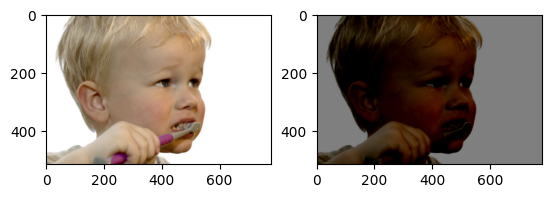

In [14]:
plt.subplot(1,2,1)
plt.imshow(image)
darken_image = image.copy().astype('int16')
print(darken_image[200, 240])
darken_image = np.where(darken_image-128<0, 0, darken_image-128)
darken_image = darken_image.astype('uint8')
print(darken_image[200, 240])
plt.subplot(1,2,2)
plt.imshow(darken_image)

#### Lower Contrast

$x' = \frac{x}{2}$

[144 127 102]
[72 63 51]


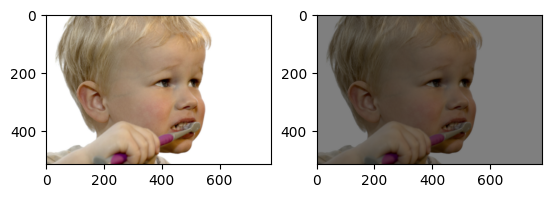

In [15]:
plt.subplot(1,2,1)
plt.imshow(image)
lowcontrast_image = image.copy()
print(lowcontrast_image[200, 240])
lowcontrast_image = lowcontrast_image/2
lowcontrast_image = lowcontrast_image.astype('uint8')
print(lowcontrast_image[200, 240])
plt.subplot(1,2,2)
plt.imshow(lowcontrast_image)

#### Non-Linear Lower Contrast

$x' = (\frac{x}{255})^{1/3} \times 255$

[144 127 102]
[210 201 187]


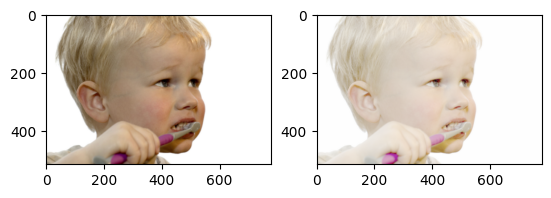

In [16]:
plt.subplot(1,2,1)
plt.imshow(image)
nonlin_lowcontrast_image = image.copy()
print(nonlin_lowcontrast_image[200, 240])
nonlin_lowcontrast_image = (nonlin_lowcontrast_image/256)**(1/3)*255
nonlin_lowcontrast_image = nonlin_lowcontrast_image.astype('uint8')
print(nonlin_lowcontrast_image[200, 240])
plt.subplot(1,2,2)
plt.imshow(nonlin_lowcontrast_image)

#### Invert

$x' = 255-x$

[144 127 102]
[112 129 154]


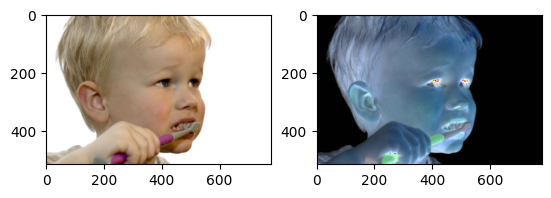

In [17]:
plt.subplot(1,2,1)
plt.imshow(image)
invert_image = image.copy()
print(invert_image[200, 240])
invert_image = 256-invert_image
invert_image = invert_image.astype('uint8')
print(invert_image[200, 240])
plt.subplot(1,2,2)
plt.imshow(invert_image)

#### Lighten

$x' = x+128$

[144 127 102]
[255 255 230]


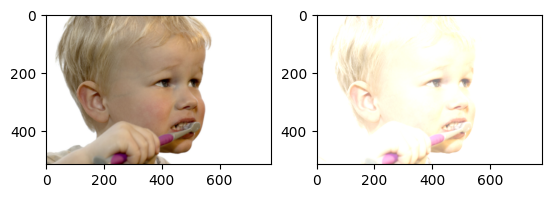

In [18]:
plt.subplot(1,2,1)
plt.imshow(image)
lighten_image = image.copy().astype('int16')
print(lighten_image[200, 240])
lighten_image = np.where(lighten_image+128>=256, 255, lighten_image+128)
lighten_image = lighten_image.astype('uint8')
print(lighten_image[200, 240])
plt.subplot(1,2,2)
plt.imshow(lighten_image)

#### Raise Contrast

$x' = x \times 2$

[144 127 102]
[255 254 204]


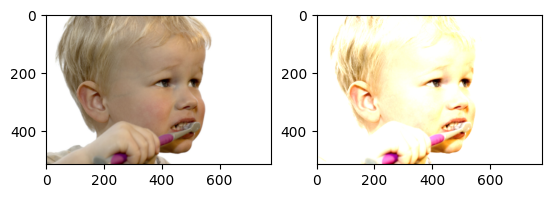

In [19]:
plt.subplot(1,2,1)
plt.imshow(image)
raisecontrast_image = image.copy().astype('int16')
print(raisecontrast_image[200, 240])
raisecontrast_image = np.where(raisecontrast_image*2>=256, 255, raisecontrast_image*2)
raisecontrast_image = raisecontrast_image.astype('uint8')
print(raisecontrast_image[200, 240])
plt.subplot(1,2,2)
plt.imshow(raisecontrast_image)

#### Non-Linear Raise Contrast

$x' = (\frac{x}{255})^{2} \times 255$

[144 127 102]
[81 63 40]


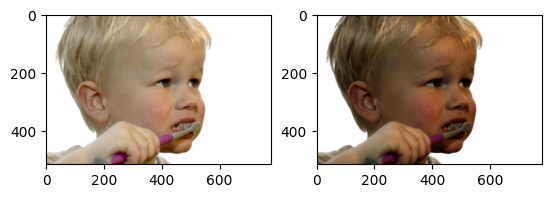

In [20]:
plt.subplot(1,2,1)
plt.imshow(image)
nonlin_raisecontrast_image = image.copy()
print(nonlin_raisecontrast_image[200, 240])
nonlin_raisecontrast_image = (nonlin_raisecontrast_image/255)**(2)*255
nonlin_raisecontrast_image = nonlin_raisecontrast_image.astype('uint8')
print(nonlin_raisecontrast_image[200, 240])
plt.subplot(1,2,2)
plt.imshow(nonlin_raisecontrast_image)

#### Grayscale

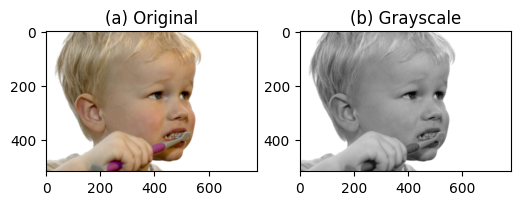

In [21]:
plt.figure(figsize=(6,6))

plt.subplot(1, 2, 1)
tmp = image.copy()
plt.title('(a) Original')
plt.imshow(tmp)

plt.subplot(1, 2, 2)
grayscale = tmp[:,:,0]*0.299+tmp[:,:,1]*0.587+tmp[:,:,1]*0.114
plt.title('(b) Grayscale')
plt.imshow(grayscale, cmap='gray')

#### Gamma Correction

$y = 255 \times (\frac{x}{255})^{\frac{1}{\gamma}}$

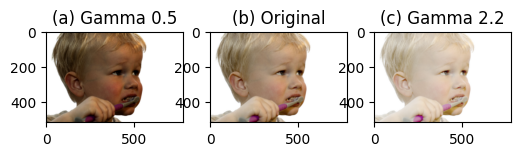

In [22]:
plt.figure(figsize=(6,6))

gamma09 = image.copy()
gamma09 = 255*(tmp/255)**(1/0.5)
gamma09 = gamma09.astype('uint8')
plt.subplot(1, 3, 1)
plt.title('(a) Gamma 0.5')
plt.imshow(gamma09)

plt.subplot(1, 3, 2)
tmp = image.copy()
plt.title('(b) Original')
plt.imshow(tmp)

gamma22 = image.copy()
gamma22 = 255*(tmp/255)**(1/2.2)
gamma22 = gamma22.astype('uint8')
plt.subplot(1, 3, 3)
plt.title('(c) Gamma 2.2')
plt.imshow(gamma22)

## Linear Shift-Invariant Image Filtering

### Box Filter

$kernel[.,.] = \frac{1}{9} 
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 
\end{bmatrix}$

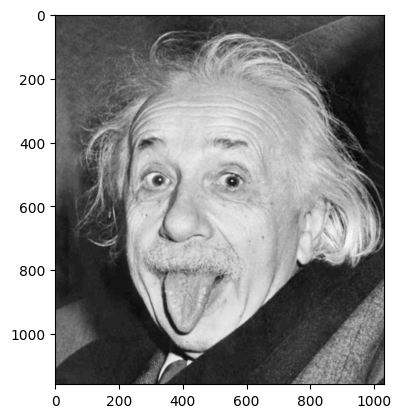

In [20]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

image = cv.imread('sample3.jpeg')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

#### Adding Border to Image

Original:  (1158, 1032)
Bordered:  (1160, 1034)


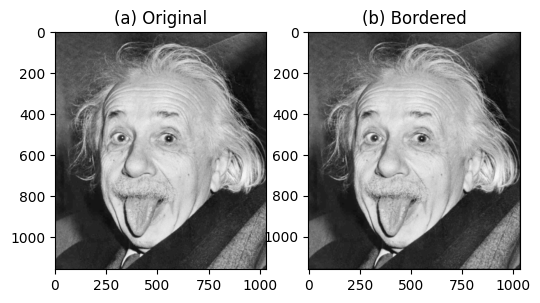

In [21]:
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.title('(a) Original')
plt.imshow(image, cmap='gray')

bordered_image = cv.copyMakeBorder(image, 1, 1, 1, 1, cv.BORDER_CONSTANT, value=(0,0,0))
plt.subplot(1,2,2)
plt.title('(b) Bordered')
plt.imshow(bordered_image, cmap='gray')

print('Original: ', image.shape)
print('Bordered: ', bordered_image.shape)

#### Convoluting Kernel Through the Image

In [22]:
kernel = np.array([[ 1 for j in range(3)] for i in range(3)])
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [28]:
result = np.zeros(bordered_image.shape)
for row in range(1, bordered_image.shape[0]-1):
    for col in range(1, bordered_image.shape[1]-1):
        # print(bordered_image[row-1:row+2, col-1:col+2])
        subsample = np.dot(bordered_image[row-1:row+2, col-1:col+2],kernel)
        subsample = subsample/9
        subsample = np.sum(subsample)
        # print(subsample)
        result[row, col] = np.round(subsample)
        # print(result[row-1:row+2, col-1:col+2])

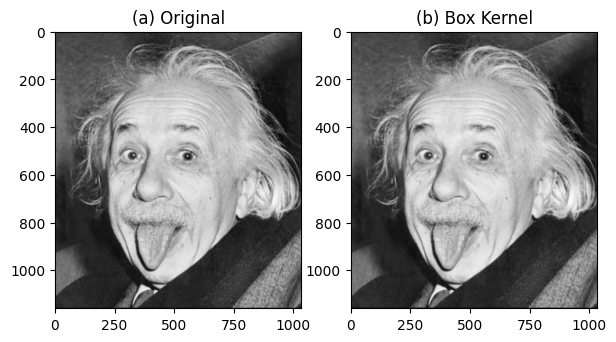

In [29]:
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.title('(a) Original')
plt.imshow(bordered_image, cmap='gray')

plt.subplot(1,2,2)
plt.title('(b) Box Kernel')
plt.imshow(result, cmap='gray')

In [88]:
print('Original:\n', bordered_image[0:3, 0:3])
print('\nBox Kernel:\n',result[0:3, 0:3])

Original:
 [[ 0  0  0]
 [ 0 65 66]
 [ 0 66 67]]

Box Kernel:
 [[ 0.  0.  0.]
 [ 0. 29. 44.]
 [ 0. 45. 67.]]


In [34]:
def box_filter(image):
    kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
    bordered_image = cv.copyMakeBorder(image, 1, 1, 1, 1, cv.BORDER_CONSTANT, value=(0,0,0))
    result = np.zeros(bordered_image.shape)
    for row in range(1, bordered_image.shape[0]-1):
        for col in range(1, bordered_image.shape[1]-1):
            subsample = np.dot(bordered_image[row-1:row+2, col-1:col+2],kernel)
            subsample = subsample/9
            subsample = np.sum(subsample)
            result[row, col] = np.round(subsample)
    
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.title('(a) Original')
    plt.imshow(bordered_image, cmap='gray')

    plt.subplot(1,2,2)
    plt.title('(b) Box Kernel')
    plt.imshow(result, cmap='gray')
    return result

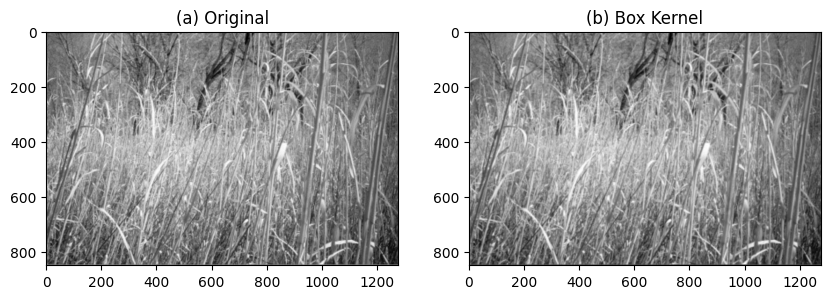

In [35]:
sample4 = cv.imread('sample4.jpeg')
sample4 = cv.cvtColor(sample4, cv.COLOR_BGR2GRAY)
result = box_filter(sample4)

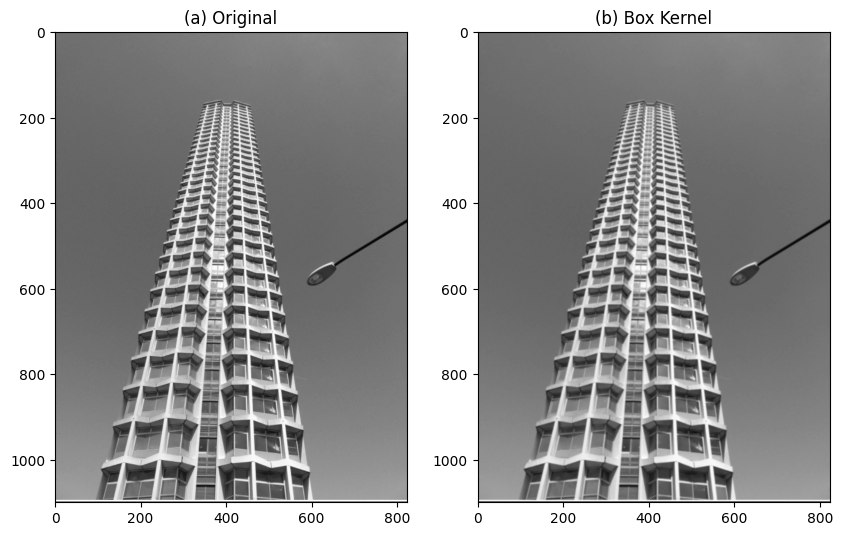

In [36]:
sample5 = cv.imread('sample5.jpeg')
sample5 = cv.cvtColor(sample5, cv.COLOR_BGR2GRAY)
result = box_filter(sample5)

### Gaussian Filter

$f(i,j)=\frac{1}{2 \pi \sigma }e^{- \frac{i^{2}+j^{2}}{2 \sigma^{2}}}$

<br />

**Kernel**
| |-1|0|1|
|-|-|-|-|
|-1|(-1,-1)|(-1,0)|(-1,1)|
|0|(0,-1)|(0,0)|(0,1)|
|1|(1,-1)|(1,0)|(1,1)|

In [3]:
import math
(1/2*math.pi)*math.e**(-1*(-1**2+0**2)/(2*math.pi**2))

1.6524239939643206

In [43]:
def gaussian_filter(image):
    import numpy as np
    import matplotlib.pyplot as plt
    kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
    bordered_image = cv.copyMakeBorder(image, 1, 1, 1, 1, cv.BORDER_CONSTANT, value=(0,0,0))
    result = np.zeros(bordered_image.shape)
    for row in range(1, bordered_image.shape[0]-1):
        for col in range(1, bordered_image.shape[1]-1):
            subsample = np.dot(bordered_image[row-1:row+2, col-1:col+2],kernel)
            subsample = subsample/16
            subsample = np.sum(subsample)
            result[row, col] = np.round(subsample)
    
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.title('(a) Original')
    plt.imshow(bordered_image, cmap='gray')

    plt.subplot(1,2,2)
    plt.title('(b) Gaussian Kernel')
    plt.imshow(result, cmap='gray')
    return result

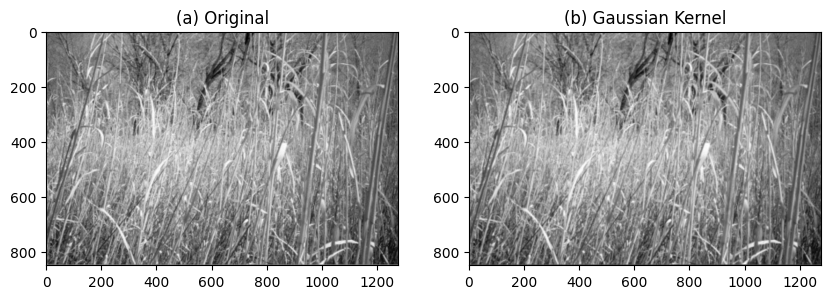

In [15]:
import cv2 as cv
sample4 = cv.imread('sample4.jpeg')
sample4 = cv.cvtColor(sample4, cv.COLOR_BGR2GRAY)
result = gaussian_filter(sample4)

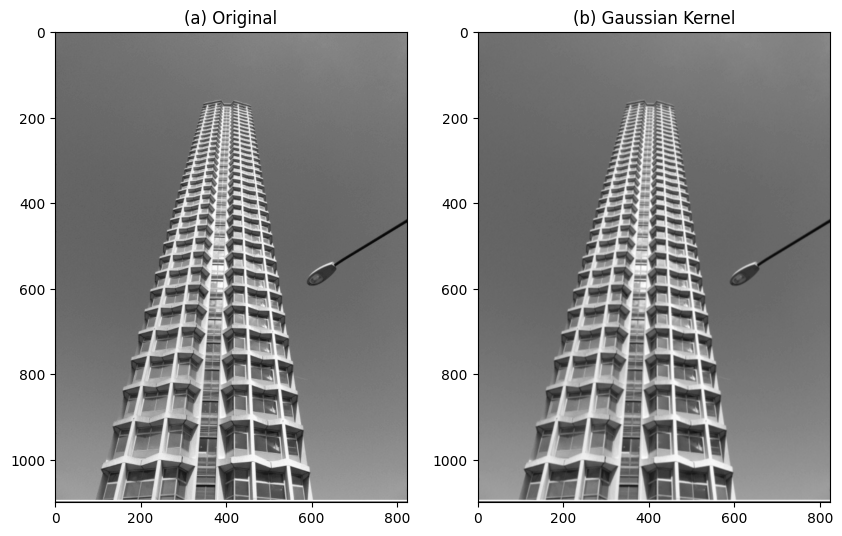

In [18]:
import cv2 as cv
sample5 = cv.imread('sample5.jpeg')
sample5 = cv.cvtColor(sample5, cv.COLOR_BGR2GRAY)
result = gaussian_filter(sample5)

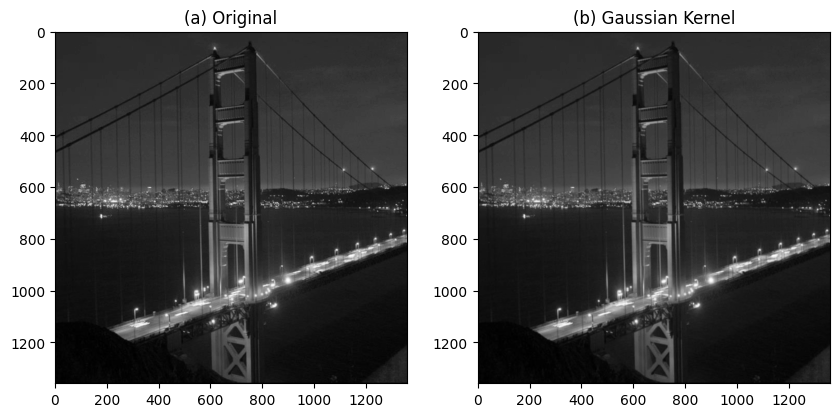

In [44]:
import cv2 as cv
sample6 = cv.imread('sample6.jpeg')
sample6 = cv.cvtColor(sample6, cv.COLOR_BGR2GRAY)
result = gaussian_filter(sample6)

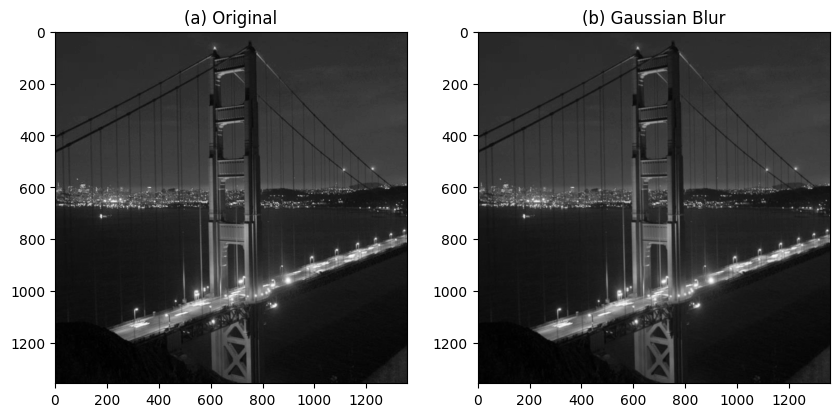

In [60]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('(a) Original')
plt.imshow(sample6, cmap='gray')
plt.subplot(1,2,2)
plt.title('(b) Gaussian Blur')
plt.imshow(cv.GaussianBlur(sample6, (3,3),0), cmap='gray')